In [1]:
'''@author: minhpham'''
from process_Inputs import *
from utils import *
from demo_utils import *
from writeSummary import *
from IPython import embed
import sys, os
import time
matplotlib.use('TkAgg')
%matplotlib inline

### Assigning network, gene inputs, and result directory ###

In [2]:
network_fl = '../data/networks/STRINGv11.txt' # protein-protein interaction network

# two gene groups that elevate porphyrin level (MP0004147_increased_porphyrin_level_; MGI database)
# Porphyrins are essential for the function of hemoglobin, which links to porphyrin, binds iron, and carries oxygen
geneList1_fl = '../data/genes/MP0004147_increased_porphyrin_level_A.txt'
geneList2_fl = '../data/genes/MP0004147_increased_porphyrin_level_B.txt'

# naming
network_name = network_fl.split('/')[-1].split('.')[0]
group1_name = 'Group A'
group2_name = 'Group B'

# Data processing
### Mapping gene names and converting network files to the appropriate format for networkx ###

In [3]:
if not os.path.exists(network_fl):
    from parseSTRING11 import getSTRINGv11
    getSTRINGv11()

### Getting network ###

In [4]:
G, graph_node, adjMatrix, node_degree, G_degree = getGraph(network_fl)
ps = getDiffusionParam(adjMatrix)
graph_node_index = getIndexdict(graph_node)
print ('Network {} has {} genes and {} edges'.format(network_name, G.number_of_nodes(), G.number_of_edges()))

Network STRINGv11 has 19344 genes and 5877115 edges


### Getting gene inputs

In [5]:
GP1_only_dict, GP2_only_dict, overlap_dict, other_dict = parseGeneInput(geneList1_fl, geneList2_fl, graph_node, graph_node_index, node_degree)
# Connectivity degrees of input genes
degree_nodes = getDegreeNode(G_degree, node_degree, other_dict['node'])
GP1_degree, GP2_degree = [], []
for i in GP1_only_dict['node']:
    GP1_degree.append(node_degree[i])
for i in GP2_only_dict['node']:
    GP2_degree.append(node_degree[i])

6 genes are mapped (out of 7) in MP0004147_increased_porphyrin_level_A
 4 genes are mapped (out of 7) in MP0004147_increased_porphyrin_level_B
 0 are overlapped and mapped (out of 0)



# Explore connectivity degrees of the network nodes and gene inputs

### Density plots of their connectivity degrees ###

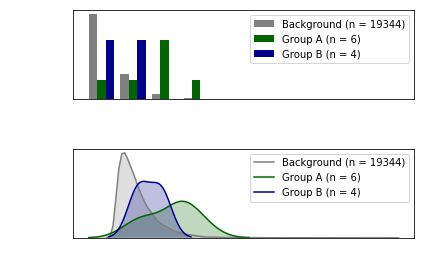

In [6]:
plt.close()
fig, axes = plt.subplots(nrows=2)
ax0, ax1 = axes.flatten()

# Histograms of degrees 
colors = ["grey", "darkgreen", "darkblue"]
labels = ["Background (n = {})".format(len(G_degree)), '{} (n = {})'.format(group1_name,len(GP1_degree)), '{} (n = {})'.format(group2_name,len(GP2_degree))]
ax0.hist([list(G_degree), GP1_degree, GP2_degree], density = True, histtype='bar', color=colors, label=labels)
ax0.set_xlabel("Connectivity degrees of nodes", color = 'white',  fontsize='x-large')
ax0.set_ylabel("Density", color = 'white',  fontsize='x-large')
ax0.legend(loc = "upper right")
ax0.tick_params(axis='x', colors='white')
ax0.tick_params(axis='y', colors='white')

# Density plot of 
sns.kdeplot(list(G_degree), color="grey", label="Background (n = {})".format(len(G_degree)), shade = True)
sns.kdeplot(GP1_degree , color="darkgreen", label='{} (n = {})'.format(group1_name,len(GP1_degree)), shade= True)
sns.kdeplot(GP2_degree , color="darkblue", label='{} (n = {})'.format(group2_name,len(GP2_degree)), shade = True)
ax1.legend(loc = "upper right")
ax1.set_xlabel("Connectivity degrees of nodes", color = 'white', fontsize='x-large')
ax1.set_ylabel("Density", color = 'white', fontsize='x-large')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')

fig.tight_layout()
plt.show()

### Histograms of the connectivity degrees for input genes

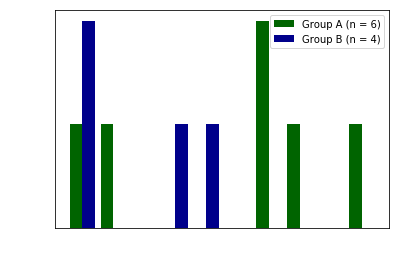

In [7]:
plt.close()
colors = ["darkgreen", "darkblue"]
labels = ['{} (n = {})'.format(group1_name,len(GP1_degree)), '{} (n = {})'.format(group2_name,len(GP2_degree))]
plt.hist([GP1_degree, GP2_degree], histtype='bar', color=colors, label=labels)
plt.xlabel("Connectivity degrees of nodes", color = 'white',  fontsize='x-large')
plt.ylabel("Count", color = 'white',  fontsize='x-large')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.legend(loc = "upper right")
plt.show()


# Models: Shortest path length vs Diffusion

In [8]:
net_var = [degree_nodes, other_dict['node'], graph_node_index, graph_node, ps, G] 

### Perform shortest path length 

Shortest Path Length
from Group A to Group B
Experimental AUROC: Shortest Path Length from Group A to Group B


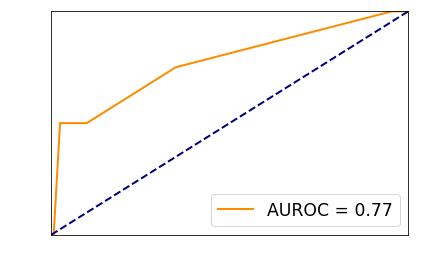

Randomize Group B : Shortest Path Length from Group A to Group B


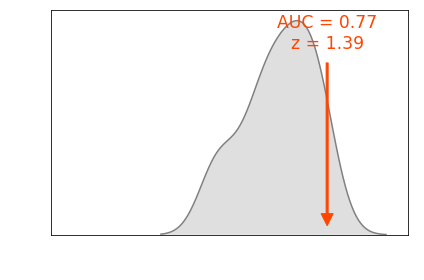

Randomize Group A : Shortest Path Length from Group A to Group B


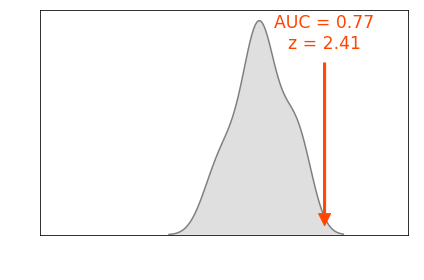

Shortest Path Length
from Group B to Group A
Experimental AUROC: Shortest Path Length from Group B to Group A


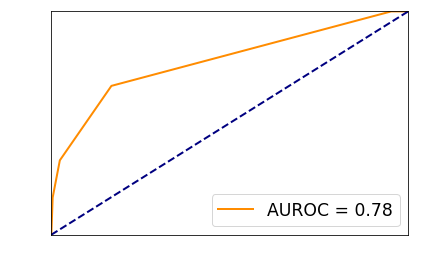

Randomize Group A : Shortest Path Length from Group B to Group A


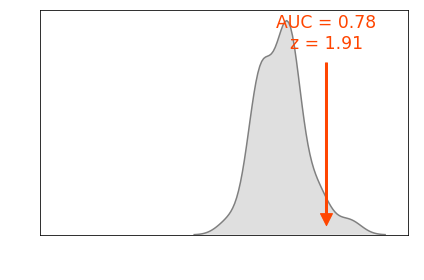

Randomize Group B : Shortest Path Length from Group B to Group A


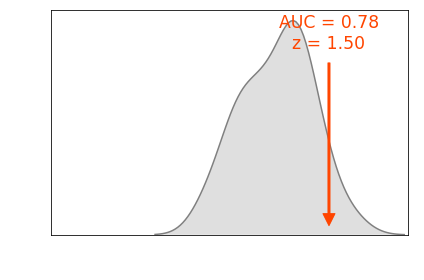

Time to run shortest path length: 620.8725261688232 seconds


In [9]:
toc = time.time()
# From group 1 to group 2:
Results_gp1_gp2 = run_method(GP1_only_dict, GP2_only_dict, group1_name, group2_name, net_var, method = 'Shortest Path Length')
# From group 2 to group 1:
Results_gp2_gp1 = run_method(GP2_only_dict, GP1_only_dict, group2_name, group1_name, net_var, method = 'Shortest Path Length', spl = Results_gp1_gp2[0]['spl'])
tic = time.time()
print ('Time to run shortest path length: {} seconds'.format(tic-toc))

### Perform diffusion

Diffusion
from Group A to Group B
Experimental AUROC: Diffusion from Group A to Group B


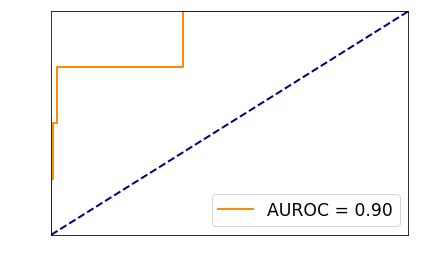

Randomize Group B : Diffusion from Group A to Group B


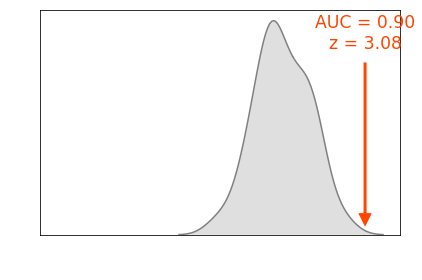

Randomize Group A : Diffusion from Group A to Group B


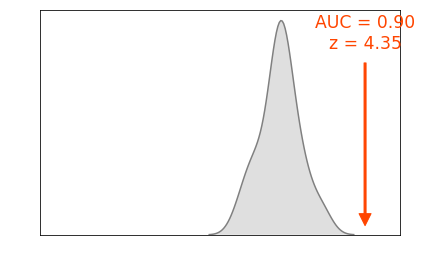

Diffusion
from Group B to Group A
Experimental AUROC: Diffusion from Group B to Group A


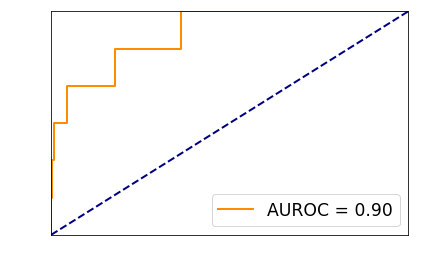

Randomize Group A : Diffusion from Group B to Group A


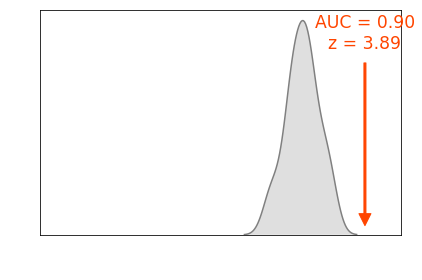

Randomize Group B : Diffusion from Group B to Group A


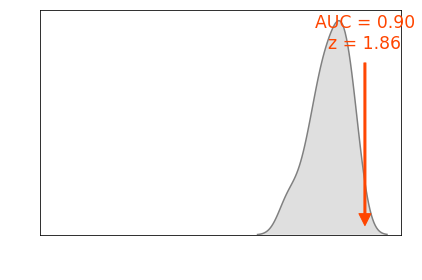

Time to run diffusion: 21.978727102279663 seconds


In [10]:
toc = time.time()
# From group 1 to group 2:
Results_gp1_gp2 = run_method(GP1_only_dict, GP2_only_dict, group1_name, group2_name, net_var, method = 'Diffusion')
# From group 2 to group 1:
Results_gp2_gp1 = run_method(GP2_only_dict, GP1_only_dict, group2_name, group1_name, net_var, method = 'Diffusion')
tic = time.time()
print ('Time to run diffusion: {} seconds'.format(tic-toc))